In [2]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from selenium import webdriver

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [95]:
# 크롤링
driver = webdriver.Chrome()

ebs = "https://mid.ebs.co.kr/course/middle/index?clsfsSysId=&orderClsfsSysId=22000014&viewType=thumbnail&searchKeyword=&isSoftware=&sortOrder="
driver.get(ebs)

title_list = []
name_list = []
target_list = []
count_list = []
book_list = []
level_list = []
period_list = []
satisfaction_list = []
number_list = []

number = 1
page_number = 1

while 1:
    time.sleep(random.uniform(0.1,1))
    try:
        driver.find_element(by='xpath',value = f'//*[@id="container"]/div[2]/div[7]/span/a[{page_number}]').click()   
        time.sleep(1)

        driver.find_element(by='xpath',value = f'//*[@id="container"]/div[2]/div[6]/table/tbody/tr[{number}]/td[1]/div/div[2]/div[2]/a/strong').click()
        time.sleep(1)

        # 강의명
        title = driver.find_element(by='xpath',value = '//*[@id="container"]/div[5]/div[1]/div[1]/div[1]/h2/strong').text
        title_list.append(title)

        # 강사님 성함
        name = driver.find_element(by='xpath',value = '//*[@id="container"]/div[5]/div[1]/div[2]/div[2]/table/tbody/tr[1]/td').text
        name_list.append(name)

        # 강의 대상 학년
        target = driver.find_element(by='xpath',value = '//*[@id="container"]/div[5]/div[1]/div[2]/div[2]/table/tbody/tr[2]/td[1]').text
        target_list.append(target)

        # 강의 재생 수
        count = driver.find_element(by='xpath',value = '//*[@id="container"]/div[5]/div[1]/div[2]/div[1]/div[3]/span[1]/span').text
        count_list.append(count)

        # 강의 교재 이름
        book = driver.find_element(by='xpath',value = '//*[@id="container"]/div[5]/div[1]/div[2]/div[2]/table/tbody/tr[5]/td').text
        book_list.append(book)

        # 강의 수준
        level = driver.find_element(by='xpath',value = '//*[@id="container"]/div[5]/div[1]/div[2]/div[2]/table/tbody/tr[2]/td[2]').text
        level_list.append(level)

        # 강의 재생 가능 기간
        period = driver.find_element(by='xpath',value = '//*[@id="container"]/div[5]/div[1]/div[2]/div[2]/table/tbody/tr[3]/td[2]').text
        period_list.append(period)

        # 강의 만족도
        satisfaction = driver.find_element(by='xpath',value = '//*[@id="container"]/div[5]/div[1]/div[2]/div[1]/div[3]/span[2]/span').text
        satisfaction_list.append(satisfaction)

        number_list.append(number)
        print('page_number :',page_number, '/ number :', number)

        number += 1

        driver.find_element(by='xpath',value = '//*[@id="container"]/div[2]/div/div[1]/ul[2]/li[2]/a').click()
        time.sleep(1)


    except:
        if page_number != 5:
            number = 1
            page_number += 1

            driver.find_element(by='xpath',value = f'//*[@id="container"]/div[2]/div[7]/span/a[{page_number}]').click()
        else:
           break
            

# DF 만들기
data = pd.DataFrame(zip(title_list,
name_list,
target_list ,
count_list ,
book_list ,
level_list ,
period_list ,
satisfaction_list))

data.columns = ['title','name','target','count','book','level','period','satisfaction']

data.to_csv('video_data.csv', index = False)

page_number : 1 / number : 1
page_number : 1 / number : 2
page_number : 1 / number : 3
page_number : 1 / number : 4
page_number : 1 / number : 5
page_number : 1 / number : 6
page_number : 1 / number : 7
page_number : 1 / number : 8
page_number : 1 / number : 9
page_number : 1 / number : 10
page_number : 1 / number : 11
page_number : 1 / number : 12
page_number : 1 / number : 13
page_number : 1 / number : 14
page_number : 1 / number : 15
page_number : 1 / number : 16
page_number : 1 / number : 17
page_number : 1 / number : 18
page_number : 1 / number : 19
page_number : 1 / number : 20
page_number : 1 / number : 21
page_number : 1 / number : 22
page_number : 1 / number : 23
page_number : 1 / number : 24
page_number : 1 / number : 25
page_number : 1 / number : 26
page_number : 1 / number : 27
page_number : 1 / number : 28
page_number : 1 / number : 29
page_number : 1 / number : 30
page_number : 2 / number : 1
page_number : 2 / number : 2
page_number : 2 / number : 3
page_number : 2 / numb

In [31]:
# 크롤링
crawling_period = input('원하는 기간을 입력해주세요 :')

print(f'{crawling_period}개월의 데이터 크롤링 중...')

# 데이터 저장 폴더 생성
file_name = 'period_video_data'
if not os.path.exists(f'./{file_name}'):
    os.mkdir(f'./{file_name}')
    print('폴더를 생성했습니다.')
else:
    print('폴더가 이미 존재합니다.')

driver = webdriver.Chrome()

ebs = "https://mid.ebs.co.kr/course/popularCourse"
driver.get(ebs)


# 과목을 수학으로 설정
driver.find_element(by='xpath',value = '//*[@id="container"]/div[4]/form/fieldset/div/span[2]/select[2]/option[4]').click()
time.sleep(1)


while 1:

    for period in range(int(crawling_period) + 1):


        # i 번 만큼 전월로 가는 화살표 버튼 클릭
        if period > 0:

            # 달력 열기 (시작일자)
            driver.find_element(by='xpath',value = '//*[@id="container"]/div[4]/form/fieldset/div/span[1]/span[1]/a').click()
            time.sleep(1)

            for click_count in range(period):

                driver.find_element(by='xpath',value = '//*[@id="ui-datepicker-div"]/div/a[1]/span').click()

            date = driver.find_element(by='xpath',value = '//*[@id="ui-datepicker-div"]/div/div').text
            
            print(date)

            d = 1

            # 조회 기간의 1일 설정
            while 1:

                time.sleep(1)
                
                # 해당 월의 첫번째 줄 첫번째 칸에 해당 월이 시작하지 않으면 오른쪽으로 한칸 이동해서 클릭하도록 설정
                try:    
                    driver.find_element(by='xpath',value = f'//*[@id="ui-datepicker-div"]/table/tbody/tr[1]/td[{d}]/a').click()
                    
                    break
                
                except:
                    d += 1

            # 달력 열기 (종료일자)
            driver.find_element(by='xpath',value = '//*[@id="container"]/div[4]/form/fieldset/div/span[1]/span[3]/a').click()
            time.sleep(1)

            for click_count in range(period):

                driver.find_element(by='xpath',value = '//*[@id="ui-datepicker-div"]/div/a[1]/span').click()

            d = 7
            w = 6

                # 조회 기간의 말일 설정
            while 1:

                time.sleep(1)

        # 해당 월의 첫번째 줄 첫번째 칸에 해당 월이 시작하지 않으면 오른쪽으로 한칸 이동해서 클릭하도록 설정
                try:
                    driver.find_element(by='xpath',value = f'//*[@id="ui-datepicker-div"]/table/tbody/tr[{w}]/td[{d}]/a').click()

                    break
                
                except:
                    d -= 1

                    if d == 0:
                        w -= 1
                        d = 7
                    else:
                        continue
                    
                            
        elif period == 0:
            continue

            # 검색 버튼 클릭
        driver.find_element(by='xpath',value = '//*[@id="container"]/div[4]/form/fieldset/div/span[2]/button[1]').click()

        print('crawling start')

        year = date.split("월")[1].strip(" ")

        if len(date.split("월")[0]) == 1:
            month = '0' + date.split("월")[0]
        else:
            month = date.split("월")[0]

        date = year + '-' + month   

        # 강좌 스트리밍 순위 크롤링
        streaming_video_list = []
        streaming_teacher_list = []
        streaming_usercount_list = []
        streaming_rank_list = []

        for video_rank in range(1,21):
            video_name = driver.find_element(by='xpath',value = f'//*[@id="ranking_board"]/table/tbody/tr[{video_rank}]/td[2]').text
            teacher_name = driver.find_element(by='xpath',value = f'//*[@id="ranking_board"]/table/tbody/tr[{video_rank}]/td[3]').text
            usercount = driver.find_element(by='xpath',value = f'//*[@id="ranking_board"]/table/tbody/tr[{video_rank}]/td[4]').text

            streaming_video_list.append(video_name)
            streaming_teacher_list.append(teacher_name)
            streaming_usercount_list.append(usercount)
            streaming_rank_list.append(video_rank)

        streaming = pd.DataFrame(zip(streaming_rank_list, streaming_video_list, streaming_teacher_list, streaming_usercount_list))
        streaming.columns = ['video_rank','video_name','teacher_name','user_count']
        streaming.index = streaming['video_rank']
        streaming.drop(columns=['video_rank'],inplace = True)

        streaming.to_csv(f'./{file_name}/{date}_streaming_video_data.csv', index = False)

        # 강좌 다운로드 순위 크롤링
        download_video_list = []
        download_teacher_list = []
        download_usercount_list = []
        download_rank_list = []

        for video_rank in range(1,21):
            video_name = driver.find_element(by='xpath',value = f'//*[@id="ranking_board1"]/table/tbody/tr[{video_rank}]/td[2]').text
            teacher_name = driver.find_element(by='xpath',value = f'//*[@id="ranking_board1"]/table/tbody/tr[{video_rank}]/td[3]').text
            usercount = driver.find_element(by='xpath',value = f'//*[@id="ranking_board1"]/table/tbody/tr[{video_rank}]/td[4]').text

            download_video_list.append(video_name)
            download_teacher_list.append(teacher_name)
            download_usercount_list.append(usercount)
            download_rank_list.append(video_rank)

        download = pd.DataFrame(zip(download_rank_list, download_video_list, download_teacher_list, download_usercount_list))
        download.columns = ['video_rank','video_name','teacher_name','user_count']
        download.index = download['video_rank']
        download.drop(columns=['video_rank'],inplace = True)

        download.to_csv(f'./{file_name}/{date}_download_video_data.csv', index = False)

    break

12개월의 데이터를 크롤링하겠습니다.
폴더를 생성했습니다.
10월 2023
crawling start
9월 2023
crawling start
8월 2023
crawling start
7월 2023
crawling start
6월 2023
crawling start
5월 2023
crawling start
4월 2023
crawling start
3월 2023
crawling start
2월 2023
crawling start
1월 2023
crawling start
12월 2022
crawling start
11월 2022
crawling start


In [33]:
total_video_data = pd.read_csv('./total_video_data.csv')

In [34]:
total_video_data

,title,name,target,count,book,level,period,satisfaction
0,EBS 중학 뉴런 수학2(하),손석민 선생님,2학년,"194,806명",EBS 중학 뉴런 수학2 (하),중급,350일,99%
1,EBS 중학 뉴런 수학1(하),이지연 선생님,1학년,"232,102명",EBS 중학 뉴런 수학1(하),중급,350일,99%
2,EBS 수학의 답,"이지연, 손석민 선생님",공통,"324,869명",수학의 답 중학 수학 1외 2권,공통,365일,99%
3,EBS 중학 뉴런 수학1(상),이지연 선생님,1학년,"481,279명",EBS 중학 뉴런 수학1(상),중급,336일,99%
4,[기본] EBS 중학 뉴런 수학2(하) (개념편),서채은 선생님,2학년,"48,372명",EBS 중학 뉴런 수학2 (하),중급,203일,99%
...,...,...,...,...,...,...,...,...
117,EBS 중학 수학 ⓜ포스 유형편2(상),전미정 선생님,2학년,"11,964명",EBS 중학 m포스 유형편 2 (상),중급,280일,99%
118,중학 수학 마스터 고난도 Σ(시그마) 3-2 : 수행평가 대비 특강,김구 선생님,3학년,32명,EBS 중학 수학 마스터 고난도 Σ(시그마..,중급,365일,0%
119,EBS 중학 수학 ⓜ포스 마스터편2(상),서채은 선생님,2학년,"7,268명",EBS 중학 m포스 마스터편 2 (상),고급,280일,99%
120,중학 수학 마스터 고난도 Σ(시그마) 3-1 : 수행평가 대비 특강,김구 선생님,3학년,24명,EBS 중학 수학 마스터 고난도 Σ(시그마) 3-1,중급,365일,0%


In [5]:
total_video_data['book'].value_counts()

교재없음                                8
EBS 중학 뉴런 수학2 (상)                   6
EBS 중학 뉴런 수학3 (상)                   6
EBS 중학 뉴런 수학2 (하)                   5
EBS 중학 뉴런 수학1(상)                    5
                                   ..
EBS 중학 수학 마스터 유형(베타) 1-2            1
EBS 강의노트 중학 수학 개념 끝장내기 - 확률과 통..    1
EBS 중학 수학 마스터 유형(베타) 2-2            1
EBS 중학 m포스 마스터편 1 (하)               1
2023 중학 수학 내신 대비 기출문제집 3-1 중간고..    1
Name: book, Length: 71, dtype: int64

In [11]:
total_video_data[total_video_data['book'] == 'EBS 중학 뉴런 수학3 (상)']['title']

10     [기본] EBS 중학 뉴런 수학3(상) (개념편)
13                EBS 중학 뉴런 수학3(상)
52           [발전] EBS 중학 뉴런 수학3(상)
66     [기본] EBS 중학 뉴런 수학3(상) (문제편)
82              [2주 라이브 특강] 중3- 수학
88    중학 뉴런 수학3(상)-수행/서술형 평가 대비 특강
Name: title, dtype: object

In [12]:
total_video_data[total_video_data['book'] == 'EBS 중학 뉴런 수학2 (상)']['title']

6                  EBS 중학 뉴런 수학2(상)
12      [기본] EBS 중학 뉴런 수학2(상) (개념편)
54            [발전] EBS 중학 뉴런 수학2(상)
70               [2주 라이브 특강] 중2- 수학
93      [기본] EBS 중학 뉴런 수학2(상) (문제편)
109    중학 뉴런 수학2(상)-수행/서술형 평가 대비 특강
Name: title, dtype: object

In [38]:
import pandas as pd

filtered_df = total_video_data[total_video_data['book'] == 'EBS 중학 뉴런 수학2 (상)'][['title']]
filtered_df_reset = filtered_df.reset_index(drop=True)
filtered_df_reset

,title
0,EBS 중학 뉴런 수학2(상)
1,[기본] EBS 중학 뉴런 수학2(상) (개념편)
2,[발전] EBS 중학 뉴런 수학2(상)
3,[2주 라이브 특강] 중2- 수학
4,[기본] EBS 중학 뉴런 수학2(상) (문제편)
5,중학 뉴런 수학2(상)-수행/서술형 평가 대비 특강


In [26]:
total_best_video = pd.DataFrame({
    '강좌': total_video_data[total_video_data['book'] == 'EBS 중학 뉴런 수학2 (상)']['title'],
    '수강생 수': total_video_data[total_video_data['book'] == 'EBS 중학 뉴런 수학2 (상)']['count'],
    '강사': total_video_data[total_video_data['book'] == 'EBS 중학 뉴런 수학2 (상)']['name'],
    '교재': total_video_data[total_video_data['book'] == 'EBS 중학 뉴런 수학2 (상)']['book']
})


In [27]:
total_best_video

,강좌,수강생 수,강사,교재
6,EBS 중학 뉴런 수학2(상),"316,280명",손석민 선생님,EBS 중학 뉴런 수학2 (상)
12,[기본] EBS 중학 뉴런 수학2(상) (개념편),"93,469명",서채은 선생님,EBS 중학 뉴런 수학2 (상)
54,[발전] EBS 중학 뉴런 수학2(상),"14,786명",변창현 선생님,EBS 중학 뉴런 수학2 (상)
70,[2주 라이브 특강] 중2- 수학,"57,588명",손석민 선생님,EBS 중학 뉴런 수학2 (상)
93,[기본] EBS 중학 뉴런 수학2(상) (문제편),"21,385명",서채은 선생님,EBS 중학 뉴런 수학2 (상)
109,중학 뉴런 수학2(상)-수행/서술형 평가 대비 특강,117명,서채은 선생님,EBS 중학 뉴런 수학2 (상)


In [143]:
best_title = total_best_video['title'].values
best_title

array(['EBS 중학 뉴런 수학2(상)', '[기본] EBS 중학 뉴런 수학2(상) (개념편)',
       '[발전] EBS 중학 뉴런 수학2(상)', '[2주 라이브 특강] 중2- 수학',
       '[기본] EBS 중학 뉴런 수학2(상) (문제편)', '중학 뉴런 수학2(상)-수행/서술형 평가 대비 특강'],
      dtype=object)

In [144]:
path = os.getcwd()
best_video = []

for csv_name in os.listdir(path + '\\period_video_data\\streaming'):
    video_list = pd.read_csv(path + '\\period_video_data\\streaming\\' + csv_name)
    for video_rank in range(len(video_list['video_name'])):
        if video_list['video_name'][video_rank] in best_title:
            best_video.append(video_list.loc[video_rank])

best_streaming_video = pd.DataFrame(best_video)\

best_streaming_video

,video_name,teacher_name,user_count
5,EBS 중학 뉴런 수학2(상),손석민,"32,453"
4,EBS 중학 뉴런 수학2(상),손석민,"48,897"
1,EBS 중학 뉴런 수학2(상),손석민,"112,940"
1,EBS 중학 뉴런 수학2(상),손석민,"115,841"
1,EBS 중학 뉴런 수학2(상),손석민,"99,564"
1,EBS 중학 뉴런 수학2(상),손석민,"104,117"
1,EBS 중학 뉴런 수학2(상),손석민,"93,897"
1,EBS 중학 뉴런 수학2(상),손석민,"109,643"
5,EBS 중학 뉴런 수학2(상),손석민,"68,699"
5,EBS 중학 뉴런 수학2(상),손석민,"58,256"


In [145]:
path = os.getcwd()
best_video = []

for csv_name in os.listdir(path + '\\period_video_data\\download'):
    video_list = pd.read_csv(path + '\\period_video_data\\download\\' + csv_name)
    for video_rank in range(len(video_list['video_name'])):
        if video_list['video_name'][video_rank] in best_title:
            best_video.append(video_list.loc[video_rank])

best_download_video = pd.DataFrame(best_video)

best_download_video

,video_name,teacher_name,user_count
4,EBS 중학 뉴런 수학2(상),손석민,756
2,EBS 중학 뉴런 수학2(상),손석민,"1,304"
3,EBS 중학 뉴런 수학2(상),손석민,"1,770"
3,EBS 중학 뉴런 수학2(상),손석민,"1,129"
3,EBS 중학 뉴런 수학2(상),손석민,"1,707"
4,EBS 중학 뉴런 수학2(상),손석민,"1,747"
2,EBS 중학 뉴런 수학2(상),손석민,"1,819"
2,EBS 중학 뉴런 수학2(상),손석민,"2,020"
6,EBS 중학 뉴런 수학2(상),손석민,"1,388"
5,EBS 중학 뉴런 수학2(상),손석민,"1,227"


In [21]:
# str형으로 되어있는 수치값들을 int형으로 변경
count = []
period = []
satisfaction = []

for i in range(len(data)):
    count.append(int(data['count'][i].replace('명', '').replace(',','')))
    period.append(int(data['period'][i].strip('일')))
    satisfaction.append(int(data['satisfaction'][i].strip('%')))

data['count'] = count
data['period'] = period
data['satisfaction'] = satisfaction

In [22]:
data

,title,name,target,count,book,level,period,satisfaction
0,EBS 중학 뉴런 수학2(하),손석민 선생님,2학년,194806,EBS 중학 뉴런 수학2 (하),중급,350,99
1,EBS 중학 뉴런 수학1(하),이지연 선생님,1학년,232102,EBS 중학 뉴런 수학1(하),중급,350,99
2,EBS 수학의 답,"이지연, 손석민 선생님",공통,324869,수학의 답 중학 수학 1외 2권,공통,365,99
3,EBS 중학 뉴런 수학1(상),이지연 선생님,1학년,481279,EBS 중학 뉴런 수학1(상),중급,336,99
4,[기본] EBS 중학 뉴런 수학2(하) (개념편),서채은 선생님,2학년,48372,EBS 중학 뉴런 수학2 (하),중급,203,99
...,...,...,...,...,...,...,...,...
117,EBS 중학 수학 ⓜ포스 유형편2(상),전미정 선생님,2학년,11964,EBS 중학 m포스 유형편 2 (상),중급,280,99
118,중학 수학 마스터 고난도 Σ(시그마) 3-2 : 수행평가 대비 특강,김구 선생님,3학년,32,EBS 중학 수학 마스터 고난도 Σ(시그마..,중급,365,0
119,EBS 중학 수학 ⓜ포스 마스터편2(상),서채은 선생님,2학년,7268,EBS 중학 m포스 마스터편 2 (상),고급,280,99
120,중학 수학 마스터 고난도 Σ(시그마) 3-1 : 수행평가 대비 특강,김구 선생님,3학년,24,EBS 중학 수학 마스터 고난도 Σ(시그마) 3-1,중급,365,0


In [23]:
data['target'].unique()

array(['2학년', '1학년', '공통', '3학년', '1학년, 2학년, 3학년'], dtype=object)

In [24]:
# 강의 수강 대상이 '1학년, 2학년, 3학년' 으로 구분되어 있는 경우는 1개밖에 없어서 '공통'으로 변경
data[data['target'] == '1학년, 2학년, 3학년']

,title,name,target,count,book,level,period,satisfaction
64,중학 수학 개념 끝장내기 - 수와 연산,손석민 선생님,"1학년, 2학년, 3학년",65129,EBS 강의노트 중학 수학 개념 끝장내기 - 수와 연산,중급,105,99


In [25]:
data.loc[64,'target'] = '공통'

In [26]:
data.loc[64,:]

title                    중학 수학 개념 끝장내기 - 수와 연산
name                                   손석민 선생님
target                                      공통
count                                    65129
book            EBS 강의노트 중학 수학 개념 끝장내기 - 수와 연산
level                                       중급
period                                     105
satisfaction                                99
Name: 64, dtype: object

In [27]:
data[data['target'] == '1학년, 2학년, 3학년']

,title,name,target,count,book,level,period,satisfaction


In [28]:
data.groupby('target').count().iloc[:,1]

target
1학년    32
2학년    36
3학년    41
공통     13
Name: name, dtype: int64

In [29]:
mean_list = []
name_list = []
count_list = []
name_groupby = data.groupby('book').count()


for i in range(len(data.groupby('book'))):
    name_mean = data[data['book'] == name_groupby.index[i]]['count'].mean()
 
    mean_list.append(int(name_mean))
    name_list.append(name_groupby.index[i])
    count_list.append(name_groupby['count'][i])

C:\Users\icn97\AppData\Local\Temp\ipykernel_19208\3831211034.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_list.append(name_groupby['count'][i])


In [30]:
book_mean = pd.DataFrame({'mean' :mean_list})
book_mean2 = pd.DataFrame({'name' :name_list})
book_mean3 = pd.DataFrame({'count' : count_list})

In [31]:
book_mean = book_mean2.join([book_mean, book_mean3])

In [32]:
book_mean.sort_values('mean', ascending = False)

,name,mean,count
67,수학의 답 중학 수학 1외 2권,324869,1
53,EBS 중학 신입생 예비과정 수학,158746,2
28,EBS 중학 뉴런 수학1(상),148506,5
56,EBS 중학 한장수학1 (상),101275,1
30,EBS 중학 뉴런 수학2 (상),83937,6
...,...,...,...
38,EBS 중학 수학 마스터 고난도 Σ(시그마..,658,4
11,2023 중학 수학 내신 대비 기출문제집 3-2 중간고..,566,1
8,2023 중학 수학 내신 대비 기출문제집 3-1 기말고..,537,1
42,EBS 중학 수학 마스터 고난도 Σ(시그마) 3-1,491,2


In [39]:
book_mean['mean'].max()

324869

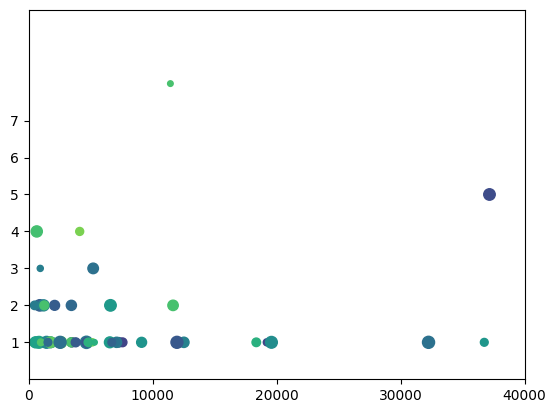

In [36]:
# 교재 별 강의 수와 강의 재생 수 비교 산점도
fig, ax = plt.subplots()
sizes = np.random.uniform(15, 80, len(mean_list))
colors = np.random.uniform(15, 80, len(count_list))


ax.scatter(mean_list, count_list,s = sizes, c = colors, vmin = 0 , vmax = 100 )

ax.set(xlim=(0, 8), xticks=np.arange(1, 800),ylim=(0, 10), yticks=np.arange(1, 8))
plt.xticks([0,10000,20000,30000,40000])

plt.show()

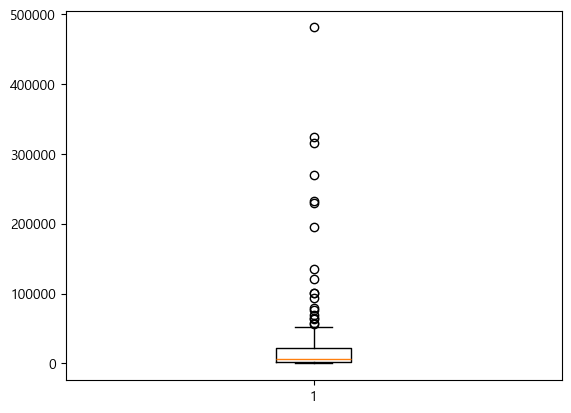

In [86]:
plt.boxplot(data['count'])
plt.show()

In [92]:
data['count'].describe()

count       122.000000
mean      33400.778689
std       72735.191814
min          24.000000
25%        1504.750000
50%        6605.000000
75%       22884.500000
max      481279.000000
Name: count, dtype: float64

In [103]:
iqr = data['count'].describe()[6] - data['count'].describe()[4]
boundary = 1.5 * iqr

data_count = data[data['count'] > data['count'].describe()[6] + boundary]
data_count

C:\Users\icn97\AppData\Local\Temp\ipykernel_19208\1253903642.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iqr = data['count'].describe()[6] - data['count'].describe()[4]
C:\Users\icn97\AppData\Local\Temp\ipykernel_19208\1253903642.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iqr = data['count'].describe()[6] - data['count'].describe()[4]
C:\Users\icn97\AppData\Local\Temp\ipykernel_19208\1253903642.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

,title,name,target,count,book,level,period,satisfaction
0,EBS 중학 뉴런 수학2(하),손석민 선생님,2학년,194806,EBS 중학 뉴런 수학2 (하),중급,350,99
1,EBS 중학 뉴런 수학1(하),이지연 선생님,1학년,232102,EBS 중학 뉴런 수학1(하),중급,350,99
2,EBS 수학의 답,"이지연, 손석민 선생님",공통,324869,수학의 답 중학 수학 1외 2권,공통,365,99
3,EBS 중학 뉴런 수학1(상),이지연 선생님,1학년,481279,EBS 중학 뉴런 수학1(상),중급,336,99
5,EBS 중학 뉴런 수학3(하),손석민 선생님,3학년,120578,EBS 중학 뉴런 수학3 (하),중급,350,99
6,EBS 중학 뉴런 수학2(상),손석민 선생님,2학년,316280,EBS 중학 뉴런 수학2 (상),중급,336,99
8,[기본] EBS 중학 뉴런 수학1(상) (개념편),최은정 선생님,1학년,135709,EBS 중학 뉴런 수학1(상),중급,77,100
10,[기본] EBS 중학 뉴런 수학3(상) (개념편),손석민 선생님,3학년,100584,EBS 중학 뉴런 수학3 (상),중급,175,99
12,[기본] EBS 중학 뉴런 수학2(상) (개념편),서채은 선생님,2학년,93469,EBS 중학 뉴런 수학2 (상),중급,151,99
13,EBS 중학 뉴런 수학3(상),채지영 선생님,3학년,229829,EBS 중학 뉴런 수학3 (상),중급,350,99


In [107]:
data[data['name'] == '손석민 선생님']

,title,name,target,count,book,level,period,satisfaction
0,EBS 중학 뉴런 수학2(하),손석민 선생님,2학년,194806,EBS 중학 뉴런 수학2 (하),중급,350,99
5,EBS 중학 뉴런 수학3(하),손석민 선생님,3학년,120578,EBS 중학 뉴런 수학3 (하),중급,350,99
6,EBS 중학 뉴런 수학2(상),손석민 선생님,2학년,316280,EBS 중학 뉴런 수학2 (상),중급,336,99
10,[기본] EBS 중학 뉴런 수학3(상) (개념편),손석민 선생님,3학년,100584,EBS 중학 뉴런 수학3 (상),중급,175,99
11,[기본] EBS 중학 뉴런 수학3(하) (개념편),손석민 선생님,3학년,48904,EBS 중학 뉴런 수학3 (하),중급,151,100
14,[발전] EBS 중학 뉴런 수학1(하),손석민 선생님,1학년,12248,EBS 중학 뉴런 수학1(하),고급,158,99
17,[발전] EBS 중학 뉴런 수학1(상),손석민 선생님,1학년,22772,EBS 중학 뉴런 수학1(상),고급,158,99
22,중학 수학 내신대비 기출문제집 2-2 기말고사,손석민 선생님,2학년,1385,2023 중학 수학 내신 대비 기출문제집 2-2 기말고..,중급,98,100
39,중학 수학 개념 끝장내기 - 함수,손석민 선생님,공통,76197,EBS 강의노트 중학 수학 개념 끝장내기 - 함수,공통,42,98
41,중학 수학 마스터 연산 1-1,손석민 선생님,1학년,3485,EBS 중학 수학 마스터 연산 ε(엡실론) 1-1,입문,365,100


In [59]:
data_level = data.groupby('level').count()

<BarContainer object of 6 artists>

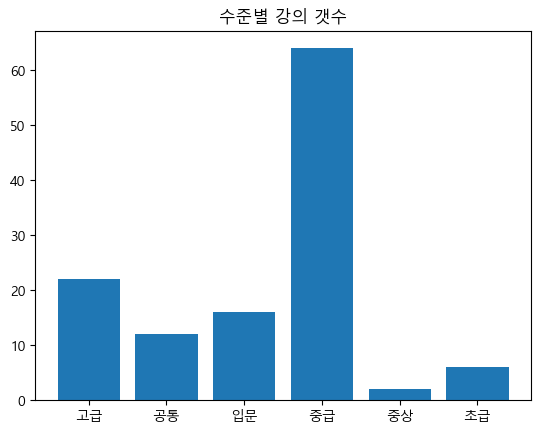

In [77]:
x = data_level.index
y = data_level.iloc[:,1]

xlabel = data_level.index
plt.title('수준별 강의 갯수')
plt.bar(x,y)

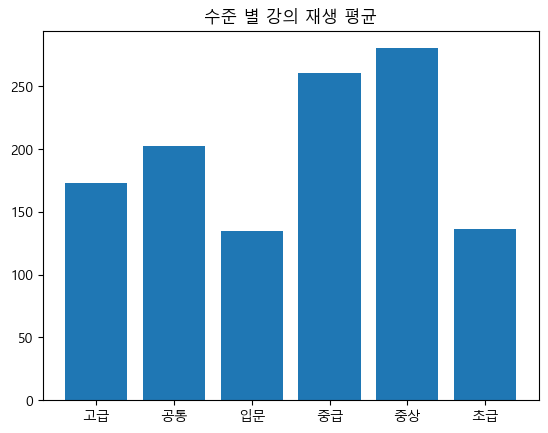

In [82]:
x = data_level.index
y = data.groupby('level').mean('count').iloc[:,1]

xlabel = data_level.index
plt.bar(x,y)
plt.title('수준 별 강의 재생 평균')

plt.show()